In [6]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm

pm.__version__

'5.22.0'

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 7298
rng = np.random.default_rng(RANDOM_SEED)
az.style.use('arviz-darkgrid')

In [3]:
# Tru param vals
alpha, sigma = 1, 1
beta = [1, 2.5]
size = 100
X1 = np.random.randn(size)
X2 = 0.2 * np.random.randn(size)
Y = alpha + beta[0]*X1 + beta[1]*X2 + sigma*rng.normal(size=size)

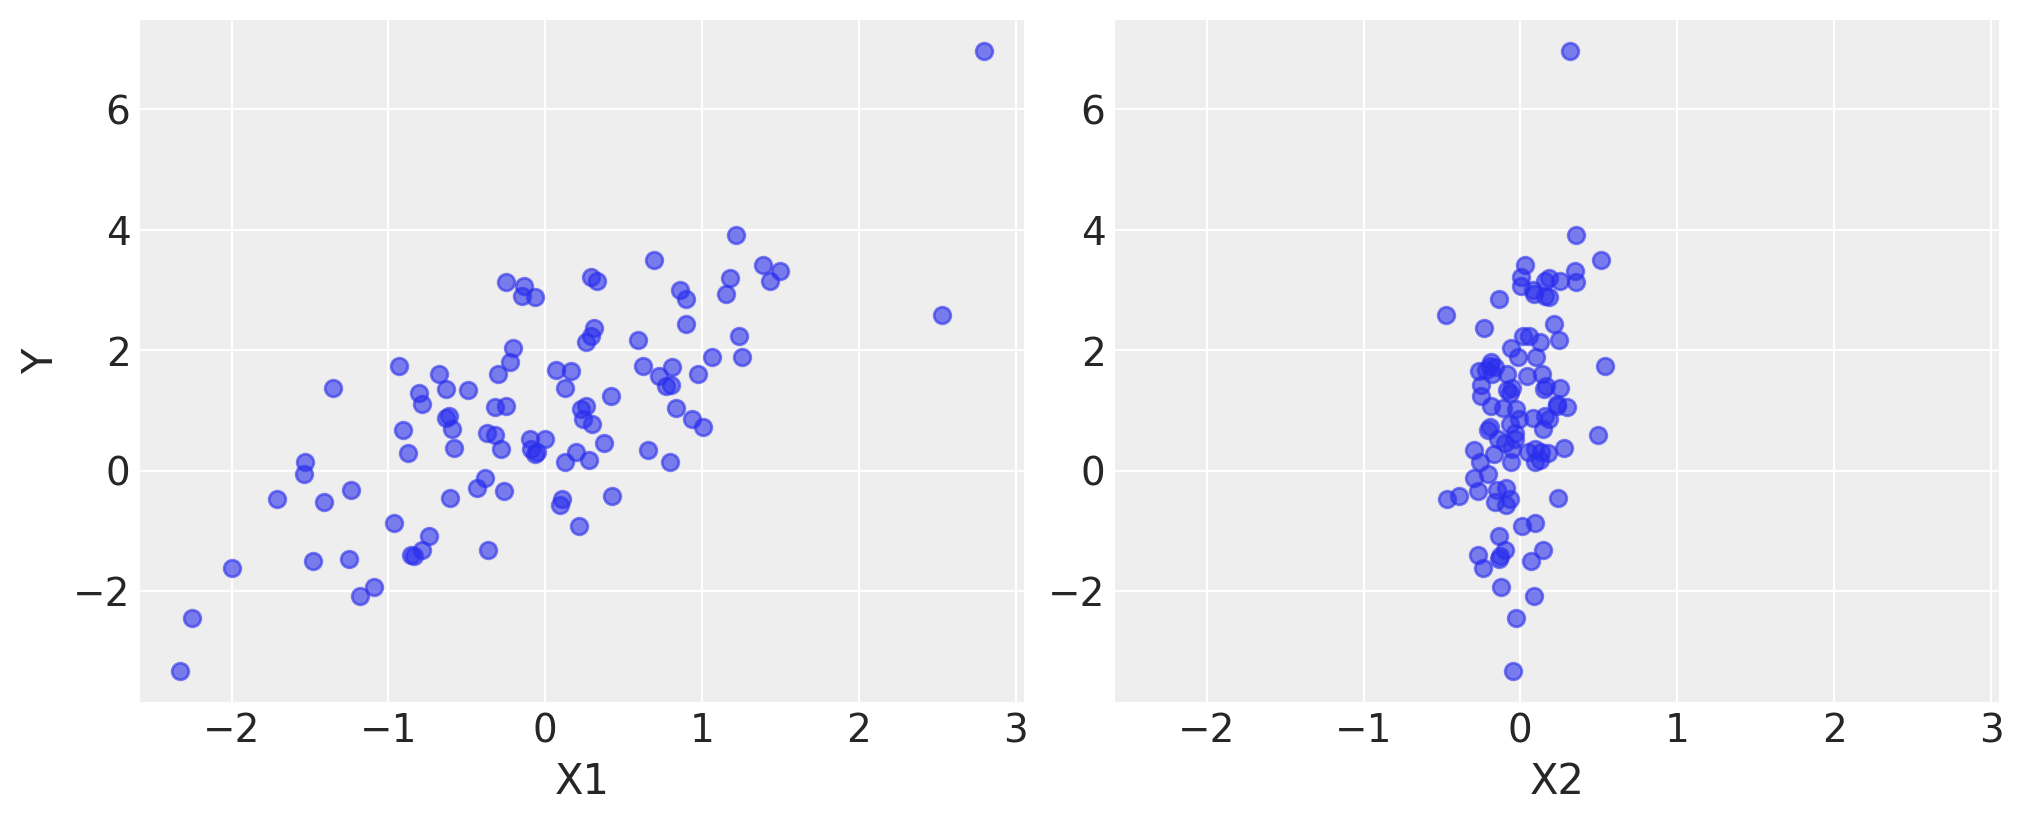

In [4]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[0].set_ylabel('Y')
axes[0].set_xlabel('X1')
axes[1].scatter(X2, Y, alpha=0.6)
axes[1].set_xlabel('X2');

In [7]:
basic_mod = pm.Model()

In [8]:
with basic_mod:
    # priors for unknown mod params
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=3)
    sigma = pm.HalfNormal('sigma', sigma=1)
    # exp val of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2
    # likelihood of observations
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=Y)